<a href="https://colab.research.google.com/github/KamyllaJawad/8-Fase-Exercicios/blob/master/N2_PO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema Identificado:

A empresa Khalel de tecido é uma grande fabricante de roupas e tecidos de alta qualidade. Para **maximizar** seus lucros e atender às demandas do mercado, a empresa precisa tomar decisões estratégicas importantes. Para isso, ela usa contratou um consultor de pesquisa operacional para otimizar sua produção e alocar seus recursos de forma eficiente.

A empresa possui máquinas de tecelagem e costura, e possui níveis de qualidade de produção sendo, tecidos de alta qualidade, roupas de alta qualidade e roupas de baixa qualidade. Porém a empresa tem algumas questões que podem restringir sua produção:

* A empresa só tem 12 máquinas de tecelagem disponívei
* A empresa só tem 6 máquinas de costura disponíveis 
* A produção de tecidos de alta qualidade requer pelo menos 2 máquinas de tecelagem
* A produção de roupas de alta qualidade requer pelo menos 2 máquina de costura
* A produção de roupas de baixa qualidade requer pelo menos 1 máquina de costura 
* A capacidade total de produção da empresa é de 100 unidades

A empresa Khalel tem o lucro de venda de cada unidade de tecido de alta qualidade por RS 100,00, cada unidade de roupa de alta qualidade por RS 200,00 e cada unidade de roupa de baixa qualidade por RS 50,00.

In [23]:
#Instalação da biblioteca pulp 
!pip install pulp
!pip install matplotlib
import pulp
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Criação do modelo
model = pulp.LpProblem('Maximização de Lucros', pulp.LpMaximize)

# Criação das variáveis de decisão
x1 = pulp.LpVariable('Máquinas de Tecelagem', lowBound=0, upBound=12, cat='Integer')
x2 = pulp.LpVariable('Máquinas de Costura', lowBound=0, upBound=6, cat='Integer')
x3 = pulp.LpVariable('Tecidos de Alta Qualidade', lowBound=0, cat='Integer')
x4 = pulp.LpVariable('Roupas de Alta Qualidade', lowBound=0, cat='Integer')
x5 = pulp.LpVariable('Roupas de Baixa Qualidade', lowBound=0, cat='Integer')

# Definição da função objetivo
model += 100*x3 + 200*x4 + 50*x5, 'Função Objetivo'

# Definição das restrições
model += x1 >= 2*x3, 'Tecidos de Alta Qualidade'
model += x2 >= 2*x4, 'Roupas de Alta Qualidade'
model += x2 >= x5, 'Roupas de Baixa Qualidade'
model += x3 + x4 + x5 <= 100, 'Capacidade de Produção'
model += x1 <= 12, 'Máquinas de Tecelagem'
model += x2 <= 6, 'Máquinas de Costura'

# Resolução do modelo
status = model.solve()

if status == pulp.LpStatusOptimal:

  # Impressão do resultado
  print('Solução ótima encontrada!')
  print('Lucro total: R$', pulp.value(model.objective))
  print('Máquinas de Tecelagem:', pulp.value(x1))
  print('Máquinas de Costura:', pulp.value(x2))
  print('Tecidos de Alta Qualidade:', pulp.value(x3))
  print('Roupas de Alta Qualidade:', pulp.value(x4))
  print('Roupas de Baixa Qualidade:', pulp.value(x5))

else:
    print("Não foi possível encontrar a solução ótima.")

Solução ótima encontrada!
Lucro total: R$ 1500.0
Máquinas de Tecelagem: 12.0
Máquinas de Costura: 6.0
Tecidos de Alta Qualidade: 6.0
Roupas de Alta Qualidade: 3.0
Roupas de Baixa Qualidade: 6.0


Podemos verificar com esses dados qual produto será mais produzido a partir de um gráfico:

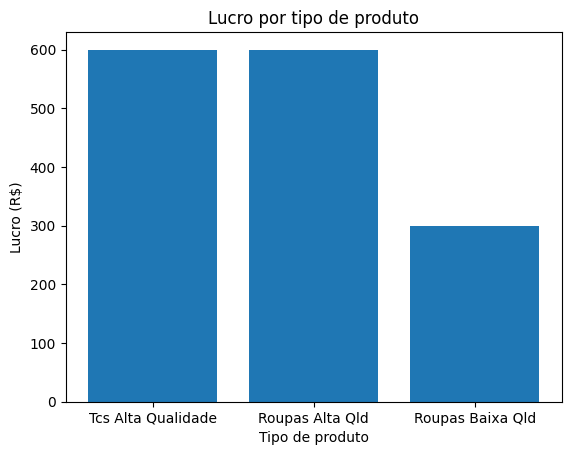

In [36]:
# Cálculo dos lucros por tipo de produto
lucro_tecidos = pulp.value(x3) * 100
lucro_roupas_alta = pulp.value(x4) * 200
lucro_roupas_baixa = pulp.value(x5) * 50

# Dados para o gráfico
labels = ['Tcs Alta Qualidade', 'Roupas Alta Qld', 'Roupas Baixa Qld']
valores = [lucro_tecidos, lucro_roupas_alta, lucro_roupas_baixa]

# Configurações do gráfico
plt.bar(labels, valores)
plt.title('Lucro por tipo de produto')
plt.xlabel('Tipo de produto')
plt.ylabel('Lucro (R$)')

# Exibir gráfico
plt.show()